In [68]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas import DataFrame
import json
from datetime import datetime
%matplotlib inline

In [5]:
low_memory=False
file_to_load = "world_mask_mandates.csv"
# Read Purchasing File and store into Pandas data frame
data_raw= pd.read_csv(file_to_load)
data_raw.head()

C:\Users\USApul\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (2,3,39,41,43) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,CountryName,CountryCode,RegionName,RegionCode,Jurisdiction,Date,C1_combined_numeric,C1_combined,C2_combined_numeric,C2_combined,...,StringencyIndex,StringencyIndexForDisplay,StringencyLegacyIndex,StringencyLegacyIndexForDisplay,GovernmentResponseIndex,GovernmentResponseIndexForDisplay,ContainmentHealthIndex,ContainmentHealthIndexForDisplay,EconomicSupportIndex,EconomicSupportIndexForDisplay
0,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200101,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200102,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200103,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200104,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,Aruba,ABW,NaN,NaN,NAT_TOTAL,20200105,0.0,0,0.0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
# # Formating Date column.
# data_raw['Date'] = pd.to_datetime(data_raw['Date'],format ='%Y%m%d')
# data_raw['H6_combined'] = data_raw.to_string(data_raw['H6_combined'])

In [10]:
data_reduced= data_raw[['CountryName','Date','H6_combined_numeric','H6_combined']]
data_reduced.head(5)

,CountryName,Date,H6_combined_numeric,H6_combined
0,Aruba,2020-01-01,0.0,0
1,Aruba,2020-01-02,0.0,0
2,Aruba,2020-01-03,0.0,0
3,Aruba,2020-01-04,0.0,0
4,Aruba,2020-01-05,0.0,0


In [7]:
data_reduced.dtypes

CountryName             object
Date                     int64
H6_combined_numeric    float64
H6_combined             object
dtype: object

In [11]:
# Formating Date column.
data_raw['Date'] = pd.to_datetime(data_raw['Date'],format ='%Y%m%d')

In [12]:
# Framinf the date range
A = '2020-05-01'
B = '2021-12-31'
data_truncated = data_reduced.loc[(data_reduced['Date'] >= A) & (data_reduced['Date'] <= B)]
data_truncated.head(5)

,CountryName,Date,H6_combined_numeric,H6_combined
121,Aruba,2020-05-01,0.0,0
122,Aruba,2020-05-02,0.0,0
123,Aruba,2020-05-03,0.0,0
124,Aruba,2020-05-04,0.0,0
125,Aruba,2020-05-05,0.0,0


In [51]:
data_six = data_truncated.loc[data_truncated['CountryName'].isin(['United States','Canada','Germany',
                                                                  'India','Japas','Sweden'])]
data_six.count()

CountryName            42090
Date                   42090
H6_combined_numeric    42021
H6_combined            42021
dtype: int64

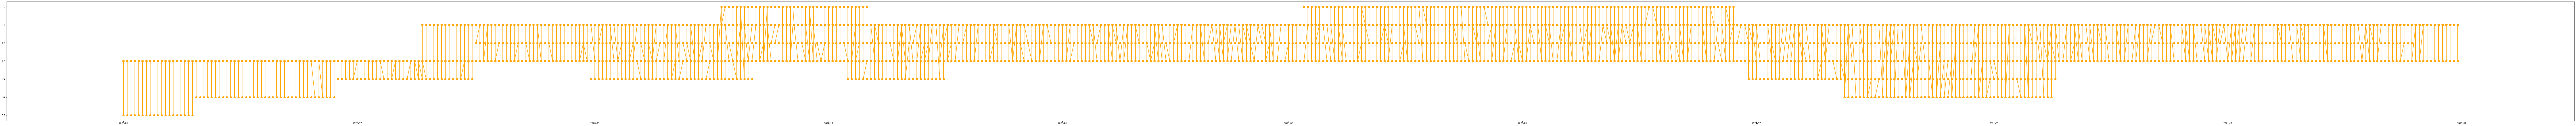

In [78]:
plot_line = data_six.loc[data_six['CountryName'] == 'Canada',:]
plot_line = plot_line.sort_values(by='Date', ascending=True)

x_axis = plot_line[['H6_combined_numeric']]
x_axis
dates = plot_line[['Date']]
dates
plt.subplots(figsize=(210, 10))
plt.plot(dates,x_axis,linewidth=2, markersize=10,marker="p",color="orange")

In [74]:
plot_line.head(-5)

,CountryName,Date,H6_combined_numeric,H6_combined
42905,Canada,2020-05-01,2.0,2G
42906,Canada,2020-05-02,2.0,2G
42907,Canada,2020-05-03,2.0,2G
42908,Canada,2020-05-04,2.0,2G
42909,Canada,2020-05-05,2.0,2G
...,...,...,...,...
53437,Canada,2021-12-22,3.0,3G
53438,Canada,2021-12-23,3.0,3G
53439,Canada,2021-12-24,3.0,3G
53440,Canada,2021-12-25,3.0,3G


In [65]:
x_axis


,H6_combined_numeric
42905,2.0
42906,2.0
42907,2.0
42908,2.0
42909,2.0
...,...
53442,3.0
53443,3.0
53444,3.0
53445,3.0


In [76]:
dates

,Date
42905,2020-05-01
42906,2020-05-02
42907,2020-05-03
42908,2020-05-04
42909,2020-05-05
...,...
53442,2021-12-27
53443,2021-12-28
53444,2021-12-29
53445,2021-12-30


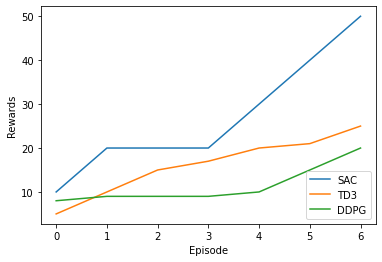

In [72]:
value1 = [10, 20, 20, 20, 30, 40, 50] 
value2 = [5, 10, 15, 17, 20, 21, 25]
value3 = [8, 9, 9, 9, 10, 15, 20]

results1 = DataFrame({'SAC': value1, 'TD3': value2, 'DDPG': value3})

results1.plot()
plt.legend(loc='lower right')
plt.xlabel("Episode")
plt.ylabel("Rewards")
plt.show()